In [1]:
options(warn = -1)

library(RSelenium)
library(tidyverse)
library(png)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.0.0     √ purrr   0.2.5
√ tibble  1.4.2     √ dplyr   0.7.8
√ tidyr   0.8.2     √ stringr 1.3.1
√ readr   1.3.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#### 브라우저로 Phantomjs 사용

pJS <- wdman::phantomjs(port = 4567L)

checking phantomjs versions:
BEGIN: PREDOWNLOAD
BEGIN: DOWNLOAD
BEGIN: POSTDOWNLOAD


In [3]:
remDr <- remoteDriver(port = 4567L, browserName  = 'phantomjs') #### port number는 임의로

remDr$open()

[1] "Connecting to remote server"
$browserName
[1] "phantomjs"

$version
[1] "2.1.1"

$driverName
[1] "ghostdriver"

$driverVersion
[1] "1.2.0"

$platform
[1] "windows-10-32bit"

$javascriptEnabled
[1] TRUE

$takesScreenshot
[1] TRUE

$handlesAlerts
[1] FALSE

$databaseEnabled
[1] FALSE

$locationContextEnabled
[1] FALSE

$applicationCacheEnabled
[1] FALSE

$browserConnectionEnabled
[1] FALSE

$cssSelectorsEnabled
[1] TRUE

$webStorageEnabled
[1] FALSE

$rotatable
[1] FALSE

$acceptSslCerts
[1] FALSE

$nativeEvents
[1] TRUE

$proxy
$proxy$proxyType
[1] "direct"


$id
[1] "3c202980-2ee5-11e9-aae5-4724bffe6b97"



In [4]:
#### Google에 이동하기

remDr$navigate("http://www.google.com/")

In [5]:
#### Title 가져오기

remDr$getTitle()[[1]]

[1] "Google"

In [6]:
#### screenshot

remDr$screenshot(display = T)

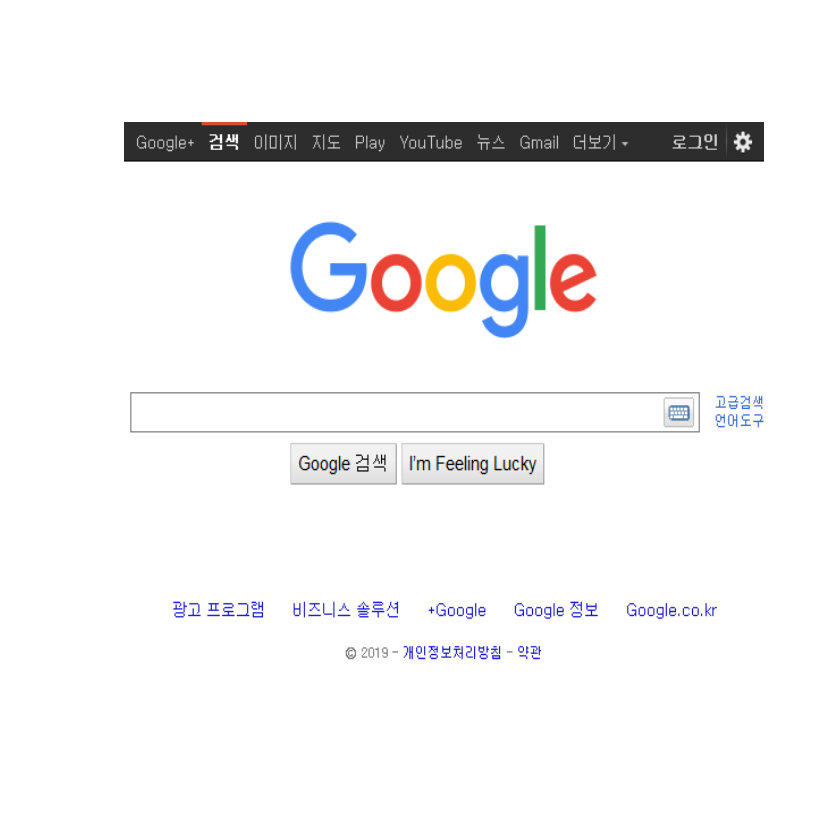

In [7]:
screenshot <- readPNG("C:\\Users\\chica\\Desktop\\tmpScreenShot.png")
plot.new()
rasterImage(screenshot, 0, 0, 1, 1)

### 마우스와 키보드 사용하기

In [8]:
#### name attribute가 'q'인 element(node)를 찾기 -> 아마 'searchform'인듯

webElem <- remDr$findElement(using = "css", "[name = 'q']")

In [9]:
webElem$sendKeysToElement(list("R Cran"))

In [10]:
remDr$screenshot(display = T)

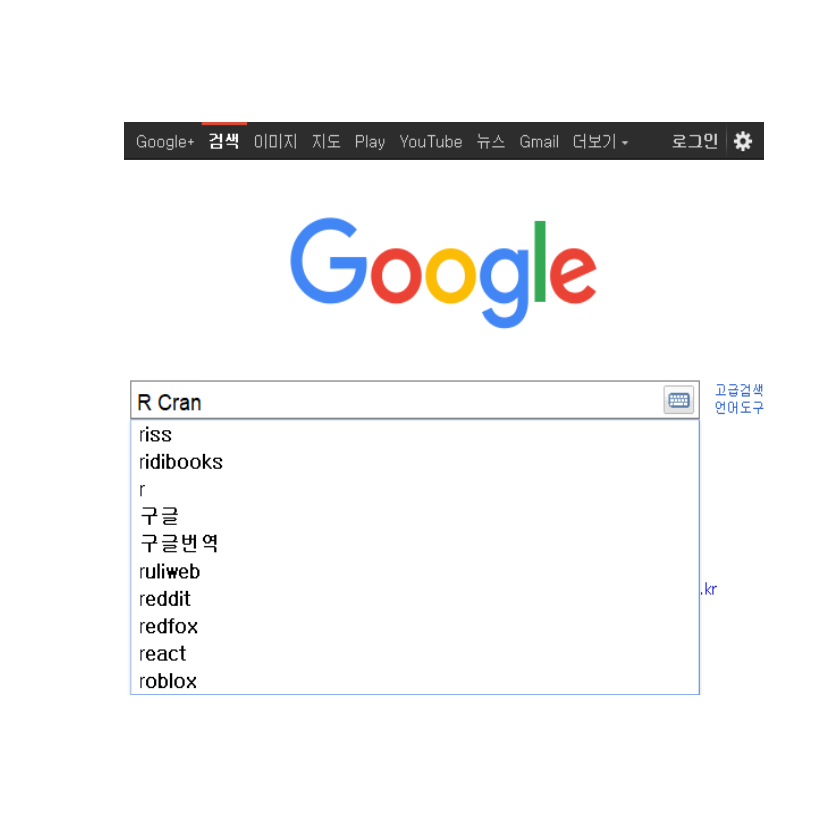

In [11]:
screenshot <- readPNG("C:\\Users\\chica\\Desktop\\tmpScreenShot2.png")
plot.new()
rasterImage(screenshot, 0, 0, 1, 1)

In [12]:
#### Enter 치기

webElem$sendKeysToElement(list(key = "enter"))

In [13]:
remDr$screenshot(display = T)

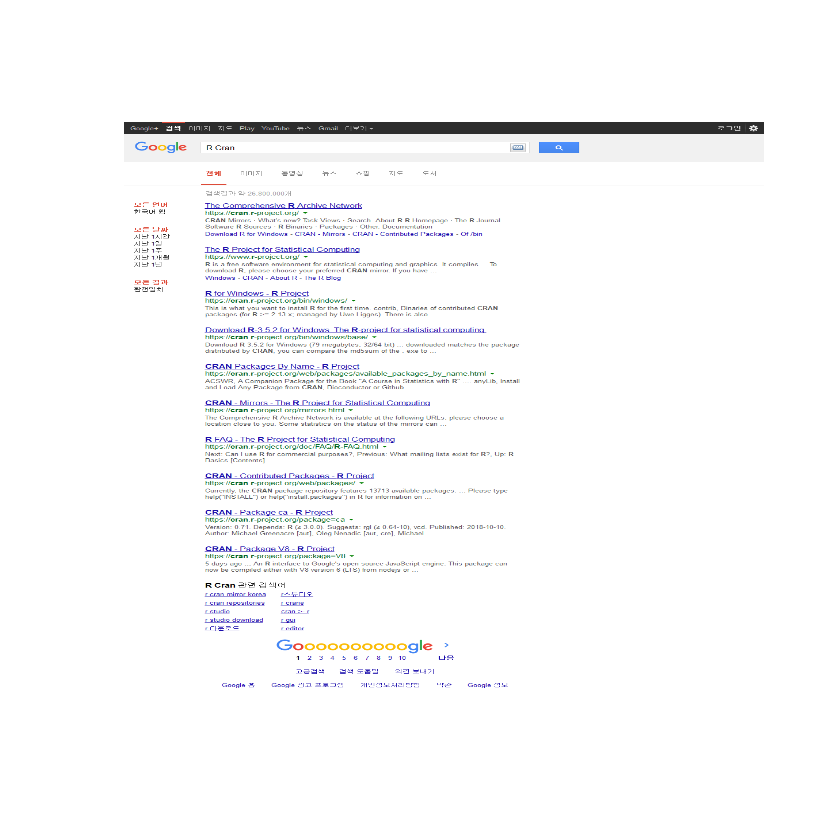

In [14]:
screenshot <- readPNG("C:\\Users\\chica\\Desktop\\tmpScreenShot3.png")
plot.new()
rasterImage(screenshot, 0, 0, 1, 1)

In [15]:
remDr$getTitle()

[[1]]
[1] "R Cran - Google 검색"

In [16]:
#### Link의 제목들 가져오기

webElems <- remDr$findElements(using = 'css', "h3.r") #### findElements! 여러개이면 다 가져오라 

resHeaders <- unlist(lapply(webElems, function(x){x$getElementText()}))

resHeaders

[1] "The Comprehensive R Archive Network"                                   
 [2] "The R Project for Statistical Computing"                               
 [3] "R for Windows - R Project"                                             
 [4] "Download R-3.5.2 for Windows. The R-project for statistical computing."
 [5] "CRAN Packages By Name - R Project"                                     
 [6] "CRAN - Mirrors - The R Project for Statistical Computing"              
 [7] "R FAQ - The R Project for Statistical Computing"                       
 [8] "CRAN - Contributed Packages - R Project"                               
 [9] "CRAN - Package ca - R Project"                                         
[10] "CRAN - Package V8 - R Project"

In [17]:
# str(webElems)

List of 10
 $ :Reference class 'webElement' [package "RSelenium"] with 18 fields
  ..$ statusCodes      :'data.frame':	25 obs. of  3 variables:
  .. ..$ Code   : int [1:25] 0 6 7 8 9 10 11 12 13 15 ...
  .. ..$ Summary: chr [1:25] "Success" "NoSuchDriver" "NoSuchElement" "NoSuchFrame" ...
  .. ..$ Detail : chr [1:25] "The command executed successfully." "A session is either terminated or not started" "An element could not be located on the page using the given search parameters." "A request to switch to a frame could not be satisfied because the frame could not be found." ...
  ..$ status           : int 0
  ..$ statusclass      : chr NA
  ..$ sessionid        : chr "3c202980-2ee5-11e9-aae5-4724bffe6b97"
  ..$ hcode            : int NA
  ..$ value            :List of 1
  .. ..$ : chr "The Comprehensive R Archive Network"
  ..$ remoteServerAddr : chr "localhost"
  ..$ port             : int 4567
  ..$ browserName      : chr "phantomjs"
  ..$ path             : chr "/wd/hub"
  ..$ versio

In [18]:
#### 마우스 움직이기

remDr$mouseMoveToLocation(webElement = webElems[[1]])
remDr$click(1) 
#### 브라우저 동작하는데 시간이 조금 걸림 Sys.sleep(1)을 추가해서 코드를 짜는것이 좋음.

In [19]:
remDr$screenshot(display = T)

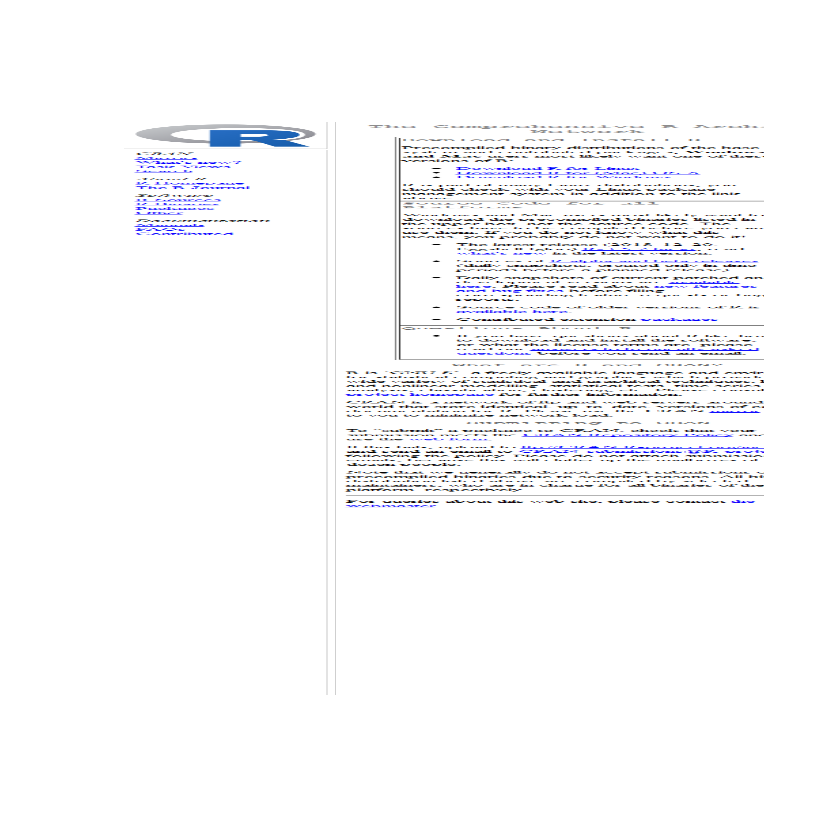

In [20]:
screenshot <- readPNG("C:\\Users\\chica\\Desktop\\tmpScreenShot4.png")
plot.new()
rasterImage(screenshot, 0, 0, 1, 1)

In [21]:
remDr$getCurrentUrl()

[[1]]
[1] "http://www.google.com/search?hl=ko&source=hp&biw=&bih=&q=R+Cran&gbv=2&oq=R+Cran&gs_l=heirloom-hp.3..0l10.1452.1462.0.2133.6.2.0.0.0.0.238.370.0j1j1.2.0....0...1.1.34.heirloom-hp..5.1.132.ZOouP5QTR58"

In [22]:
remDr$getTitle()[[1]]

[1] "R Cran - Google 검색"

In [23]:
#### 연결 끊기

remDr$close()

In [24]:
#### 브라우저 종료

pJS$stop()

[1] TRUE